<h3> GRIP internship #Oct2020 </h3>


# Author : NAZI KHALID

# Task4 : Exploratory Data Analysis Terrorism

### Task

* To find out the hot zone of terrorism.
* What all security issues and insights you can derive by EDA?


### Importing Libraries

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import folium 
from folium import plugins
from folium.plugins import HeatMap
import matplotlib.patches as mpatches
import nltk
from nltk import *
from wordcloud import WordCloud, STOPWORDS
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")
import os


In [4]:
terror = pd.read_csv("globalterrorismdb_0718dist.csv", encoding="ISO-8859-1", low_memory=False)

In [5]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Data Dictionary

* 'iyear' : year of the incident

* 'imonth' : month of the incident

* 'iday' : day of the incident

* 'nkill' : number of dead

* 'nwound' : number of wounded

* extended' : has the incident lasted for more than 24 hours?

* 'multiple' : is the incident connected to other attacks?

* 'success' : did the terrorist attack achieve its goal (i.e. assassination, etc.)?

* 'suicide' : did the incident involve a suicide attack?

* 'guncertain1' : was the terrorist group confirmed?

* 'attacktype1_txt' : general method of attack used (i.e. assassination, hijacking, bombing/explosion, etc.)

* 'targtype1_txt' : general type of target/victim (i.e. business, government, police, military, etc.)

* 'natlty1_txt' : nationality of the target/victim

* 'weaptype1_txt' : general type of weapon used in the incident (i.e. biological, chemical, firearms, etc.)

* 'target1' : specific person, building, installation, etc. that was targeted "



### It is best to always drop the features that are not needed for analysis

In [6]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [7]:
terror=terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','suicide','Summary','Group','Target_type','Motive','Weapon_type','targtype2_txt','targtype3_txt','weaptype2_txt','weaptype3_txt','weaptype4_txt','claimmode_txt','propextent_txt','propvalue','attacktype2_txt','attacktype3_txt',]]
terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,...,targtype2_txt,targtype3_txt,weaptype2_txt,weaptype3_txt,weaptype4_txt,claimmode_txt,propextent_txt,propvalue,attacktype2_txt,attacktype3_txt
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking For Null values

# need to change the motive null value

In [8]:
terror.isna().sum().sort_values(ascending=False)

weaptype4_txt      181618
attacktype3_txt    181263
targtype3_txt      180515
weaptype3_txt      179828
attacktype2_txt    175377
targtype2_txt      170547
weaptype2_txt      168564
claimmode_txt      162608
propvalue          142702
Motive             131130
propextent_txt     117626
Summary             66129
Wounded             16311
Killed              10313
longitude            4557
latitude             4556
Target                636
city                  434
state                 421
Day                     0
Country                 0
Region                  0
AttackType              0
suicide                 0
Weapon_type             0
Target_type             0
Group                   0
Month                   0
Year                    0
dtype: int64

* ######  Here, motive is the feature that contains most of the null values. This is obvious that the terrorist group which involved in the attack have to confess the motive. Untill that nobody know the motive of the attack.



<AxesSubplot:>

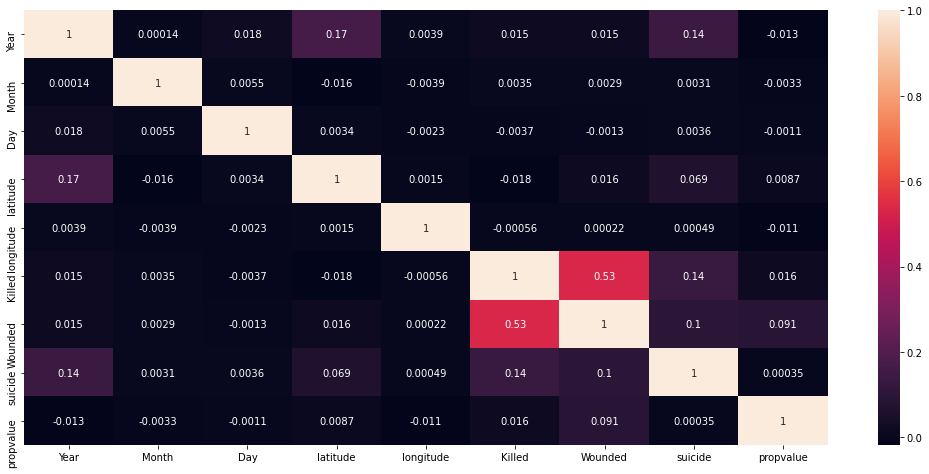

In [9]:
#correlation map 
#correlation map helps us to understanding beetwen the features relations. It means that we can understand the columns relations with each other thanks to correlation map

f,ax = plt.subplots(figsize=(18,8)) 
sns.heatmap(terror.corr(), annot=True)

* ##### We can see the correlation between Killed and Wounded are postive correlated 

## The analysis is carried out at different levels:
		1. Terrorist Group
		2. Attack types and Claiming modes
		3. Weapons used and Suicide Attacks
		4. Most Affected Target 
		5. Most Casualities 
		6. Top Countries and cities
		7. Sentimental analysis based on wordclouds 

### Preliminary Assesments - Highest preference of Terror Events happened in...

In [10]:
print("Country with the most attacks:",terror['Country'].value_counts().idxmax())
print("City with the most attacks:",terror['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror['Group'].value_counts().index[1])
print("Most Attack Types:",terror['AttackType'].value_counts().idxmax())
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)


Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion
Maximum people killed in an attack are: 1570.0 that took place in Iraq


### Plotting the global terrorist activites trend on a time scale :



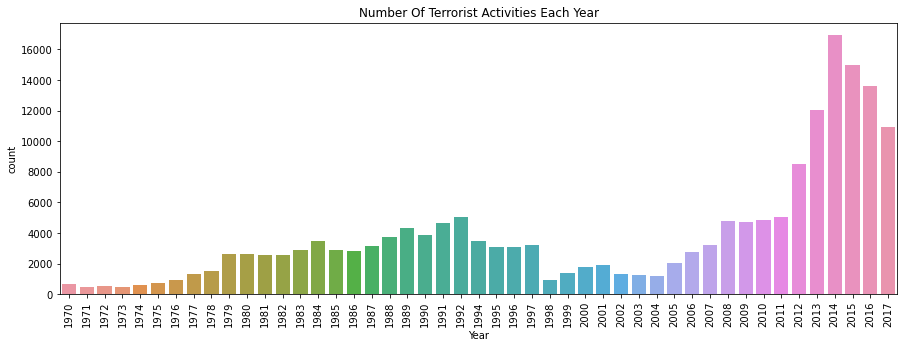

In [11]:
plt.subplots(figsize=(15,5))
sns.countplot('Year',data=terror)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

* ##### From the above graph, its very clear that the global terrorist activities hit a lowest point at the end of 19th century. But all of a sudden, it hiked to a wooping 18,000 mark in 2014.

### Most Active Terrorist Group 

In [12]:
terror['Group'].value_counts()[1:6]


Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
Name: Group, dtype: int64

### Top Active Terrorist Groups


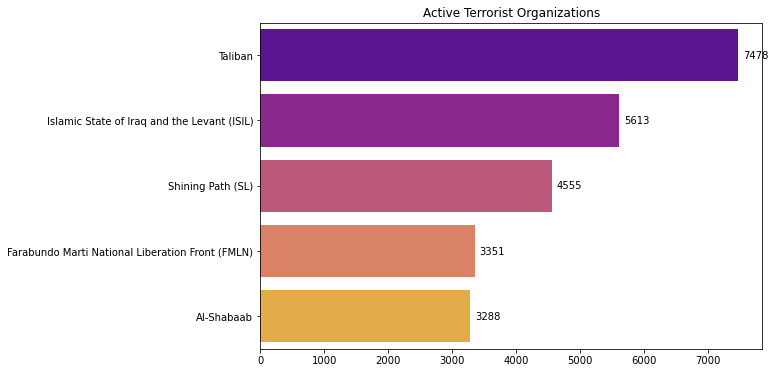

In [13]:
f, ax = plt.subplots(figsize=(9, 6)) 

bx=sns.barplot( y = terror['Group'].value_counts()[1:6].index,
            x = terror['Group'].value_counts()[1:6].values,
                palette="plasma")
ax.set_ylabel('')
ax.set_title('Active Terrorist Organizations' )
for p in bx.patches:
    bx.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show()

### Taliban Group and their attacked Locations

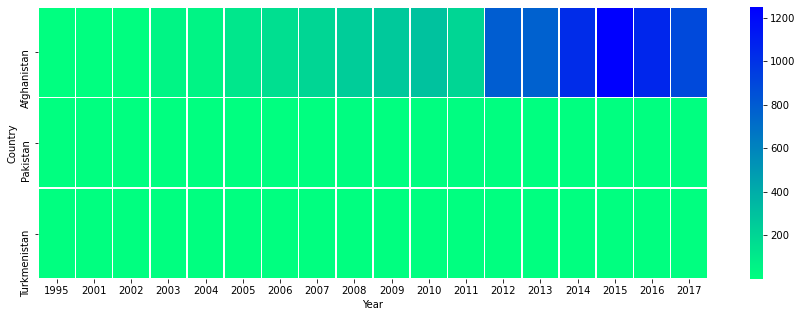

In [14]:
terror_group = terror[terror['Group'] == "Taliban"]
terror_group = terror_group.groupby(['Country','Year'])['Group'].count().unstack()
terror_group = terror_group.sort_values([2016], ascending=False)
terror_group = terror_group.fillna(0)
f, ax = plt.subplots(figsize=(15, 5)) 
g = sns.heatmap(terror_group[0:3],cmap='winter_r',linewidths=.5,vmin=0.05)
plt.show()

* #### Taliban has waged a war against Afghanistan and the number of attacks have been increased in last few years


### Attack Types


In [15]:
attack_types =  pd.concat(objs=[terror['AttackType'], 
                                    terror['attacktype2_txt'],
                                    terror['attacktype3_txt']],
                     axis=0).reset_index(drop=True)
x = attack_types.value_counts().index
y = attack_types.value_counts().values

trace2 = go.Bar(
        x=x ,
        y=y,
        marker=dict(
            color=y,
            colorscale = 'Viridis',
            reversescale = True
        ),
        name="Attack types",    
    )
layout = dict(
        title="Attack types",
        xaxis=go.layout.XAxis(
          automargin=True),
        yaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=True,
        ), 
    )
fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)


* ###### Bombing and explosions plays a major role in terrorist attacks and  followed by armed assualt and Assassination.    This indicates the misuse of science and technolgy against Humanity.



### Different Claiming modes used to assume responsibility of the attacks


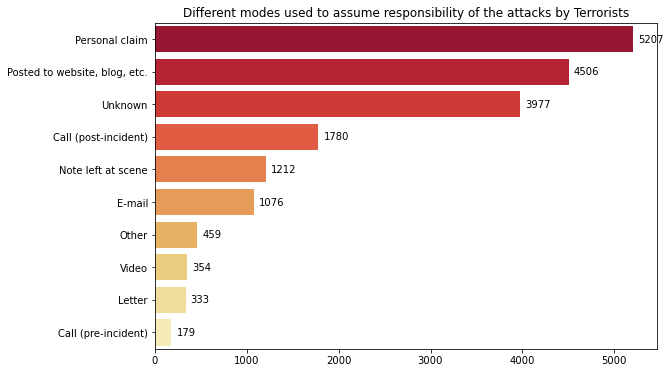

In [16]:
#terror['claimmode_txt'].value_counts()
f, ax = plt.subplots(figsize=(9, 6)) 
bx=sns.barplot( y = terror['claimmode_txt'].value_counts().index,
            x = terror['claimmode_txt'].value_counts().values,
                palette="YlOrRd_r")
for p in bx.patches:
    bx.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

ax.set_ylabel('')
ax.set_title('Different modes used to assume responsibility of the attacks by Terrorists' );


* ###### The most claiming is done thorugh personal announcement or through posting online

### Weapons used


In [17]:
weaponTypes =  pd.concat(objs=[terror['Weapon_type'], 
                                    terror['weaptype2_txt'],
                                    terror['weaptype3_txt'],
                                    terror['weaptype4_txt']],
                     axis=0).reset_index(drop=True)
x = weaponTypes.value_counts().index
y = weaponTypes.value_counts().values

trace2 = go.Bar(
        x=x ,
        y=y,
        marker=dict(
            color=y,
            colorscale = 'Viridis',
            reversescale = True
        ),
        name="Weapons used",    
    )
layout = dict(
        title="Weapons used",
        xaxis=go.layout.XAxis(
          automargin=True),
        yaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=True,
        ), 
    )
fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)


* ###### Most Bombing/Explosion has been made use of Explosives and Firearms

### Suicide attacks conducted by various Terrorist organizations


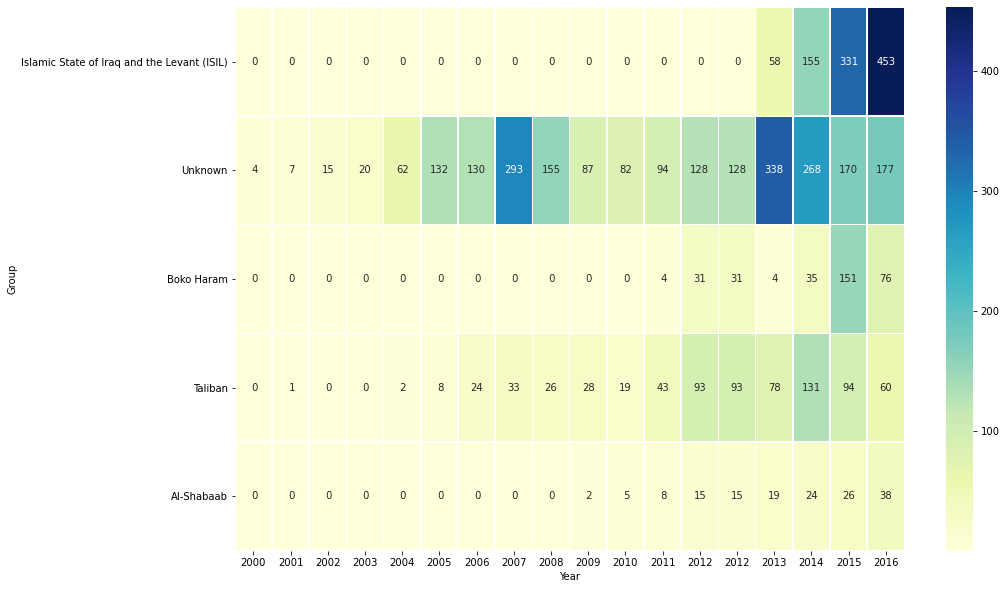

In [18]:
terror_filter = terror[terror['suicide'] == 1]
terror_filter = terror_filter.groupby(['Group','Year'])['Group'].count().unstack()
terror_filter = terror_filter[[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2012,2013,2014,2015,2016]]
terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 10)) 
g = sns.heatmap(terror_filter[0:5],annot=True,fmt="2.0f",cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()


ISIL , Boko Haram and Taliban are the deadlist organizations World has ever witnessed . Look at the increasing numbers of suicide attacks from year 2013 till 2016 which is a worrying factor and it is likely to increase further.

### Most Affected Target


In [19]:
targetTypes =  pd.concat(objs=[terror['Target_type'], 
                                    terror['targtype2_txt'],
                                    terror['targtype3_txt']],
                     axis=0).reset_index(drop=True)
x = targetTypes.value_counts().index
y = targetTypes.value_counts().values

trace2 = go.Bar(
        x=x ,
        y=y,
        marker=dict(
            color=y,
            colorscale = 'Viridis',
            reversescale = True
        ),
        name="Who sufferred the most",    
    )
layout = dict(
        title="Who sufferred the most",
        #width = 900, height = 500,
        xaxis=go.layout.XAxis(
          automargin=True),
        yaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=True,
    #         domain=[0, 0.85],
        ), 
    )
fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)


* Irony here is that innocent people are the catagory that get affected the most. The reason may be that the normal people are the easiest targets while political leaders will always be in the highest security
* Followed by Military and Police who are always in duty to protect the private cotizens and their property

### Terrorist Acts against Private Citizens & Property


In [20]:
terror_filter = terror[terror['Target_type'] == "Private Citizens & Property"]
terror_count = terror_filter.groupby(['Country'])['Target_type'].count()
countries = pd.DataFrame({'country':terror_count.index,'number':terror_count.values })
data = [dict(
    type='choropleth',
    locations=countries['country'],
    locationmode='country names',
    z=countries['number'],
    text=countries['country'],
    colorscale='Viridis',
    #reversescale=True,
    marker=dict(line=dict(color='rgb(180,180,180)', width=0.9)),
    colorbar = {'title': 'No of incidents'},
    
)]
layout = dict(
    title='No of incidents across the world to disrupt Private Citizens & Property',autosize=True,
           # width=1000, height=700,
    geo=dict(showframe=False,  projection=dict(type='mercator'),)
    
)
fig = go.Figure(data=data, layout=layout)

fig.update_layout(height=700, margin={"r":1,"t":0,"l":0,"b":0})
#fig.show()
iplot(fig)

* ###### Highest number of civilians are targeted in Iran followed by Paskiathan ,India, Afganisthan

### Terrorist Acts against Military 


In [21]:
terror_filter = terror[terror['Target_type'] == "Military"]
terror_filter = terror_filter.groupby(['Country'])['Target_type'].count()
data =  dict(
        type = 'choropleth',
        locations = terror_filter.index,
        locationmode = 'country names',
        z = terror_filter.values,
        text = terror_filter.index,
        colorscale='Viridis',
        reversescale=True,
        marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
        colorbar = {'title': 'No of incidents'})

layout = dict( title = 'No of incidents across the world to oppose their own Military',
         geo = dict(showframe = False,
         projection = {'type' : 'mercator'}))

choromap3 = go.Figure(data = [data],layout=layout)
choromap3.update_layout(height=700, margin={"r":1,"t":0,"l":0,"b":0})

iplot(choromap3)

* As always Iran is first here in attacks over Military followed by India , Pakistan and Afganistan has seen thousands of terrorists act which is a worrying factor

### Extent of Property Damage over the Years across all the countries


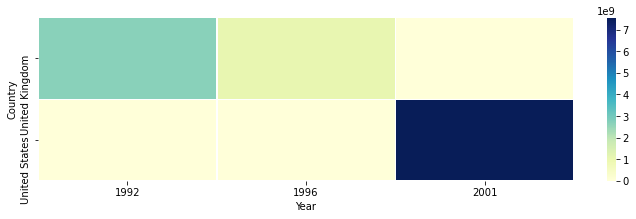

In [22]:
terror_filter = terror[terror['propextent_txt'] == "Catastrophic (likely >= $1 billion)"]
terror_filter = terror_filter[['Country','propvalue','Year']]
terror_filter = terror_filter.fillna(terror_filter.propvalue.mean())
terror_filter = terror_filter.groupby(['Country','Year'])['propvalue'].sum().unstack()
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(12,3)) 
g = sns.heatmap(terror_filter,cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

9/11 attack in USA in the Year 2001 is the deadliest attack ever since 1970



### Extent of Property Damage over the Years across the globe


In [23]:
terror_filter = terror[terror['propextent_txt'] == "Major (likely >= $1 million but < $1 billion)"]
terror_filter = terror_filter[['city','Group','propvalue','Year']]
terror_filter = terror_filter.fillna(terror_filter.propvalue.mean())
terror_filter = terror_filter.sort_values(['Year'], ascending=False)
terror_filter = terror_filter.groupby(['Year'])['propvalue'].sum()
data = [
    {
        'x': terror_filter.index,
        'y': terror_filter.values,
        'mode': 'lines',
        'marker': {
            'sizemode': 'area',
 #           'sizeref': 'sizeref',
           }
    }
]
iplot(data)


We see a ups and down in the graph , can we assume that great amount time is spent by terrorist organizations for mass destruction just before the peaks in this

### Contries having  more Casualities :



In [24]:
# Creating new feature "Casualities" by adding "Killed" and "Wounded" features
terror['casualities']=terror['Killed']+terror['Wounded']

In [25]:
terror_casualities= terror[terror['casualities'] <100]

terror_count = terror_casualities.groupby(['Country'])['casualities'].count()
countries = pd.DataFrame({'country':terror_count.index,'number':terror_count.values })
data = [dict(
    type='choropleth',
    locations=countries['country'],
    locationmode='country names',
    z=countries['number'],
    text=countries['country'],
    colorscale='emrld',
    marker=dict(line=dict(color='rgb(180,100,100)', width=0.9)),
    colorbar = {'title': 'No of terror casualities'},
    
)]
layout = dict(
    title='No of incidents across the world to disrupt Casualities',autosize=True,
    geo=dict(showframe=False,  projection=dict(type='mercator'),)
    
)
fig = go.Figure(data=data, layout=layout)

fig.update_layout(height=700, margin={"r":1,"t":0,"l":0,"b":0})
#fig.show()
iplot(fig)

### Terrorist Attacks by Region

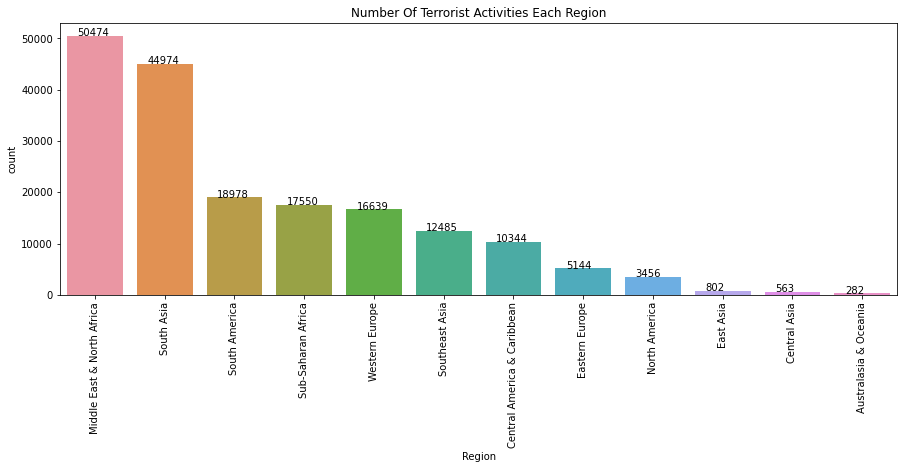

In [26]:
plt.subplots(figsize=(15,5))
ax=sns.countplot('Region',data=terror,order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Region')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()
plt.show()

* Middle East and North Africa has highest number of attacks followed by south asia amd south america

### Regions with terrorist attacks worldwide over years (1970-2010)

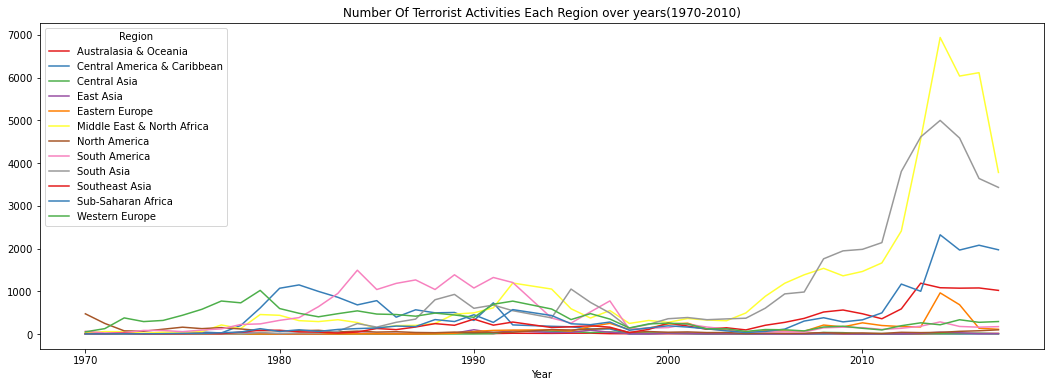

In [27]:
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Set1',12))
fig=plt.gcf()
plt.title('Number Of Terrorist Activities Each Region over years(1970-2010)')
fig.set_size_inches(18,6)
plt.show()

Middle east, North Africa, South Asia are the top most affected regions by terrorism. In this chart also we can see a complete drop in the global terrorism rate at the end of 19th century and peak after 2013.

## Time Series analysis for target Types in Top 10 countries


#### Time Series analysis for target Type:- Private Citizens & Property


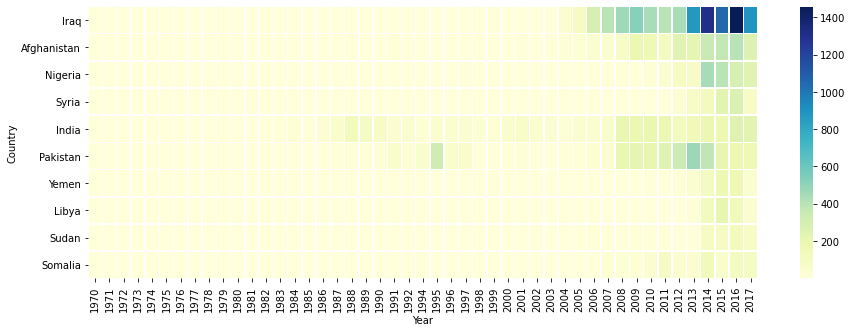

In [28]:
terror_filter = terror[terror['Target_type'] == "Private Citizens & Property"]
terror_filter = terror_filter.groupby(['Country','Year'])['Target_type'].count().unstack()

terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 5)) 
g = sns.heatmap(terror_filter[0:10],cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()


### Top countries affected by terrorism


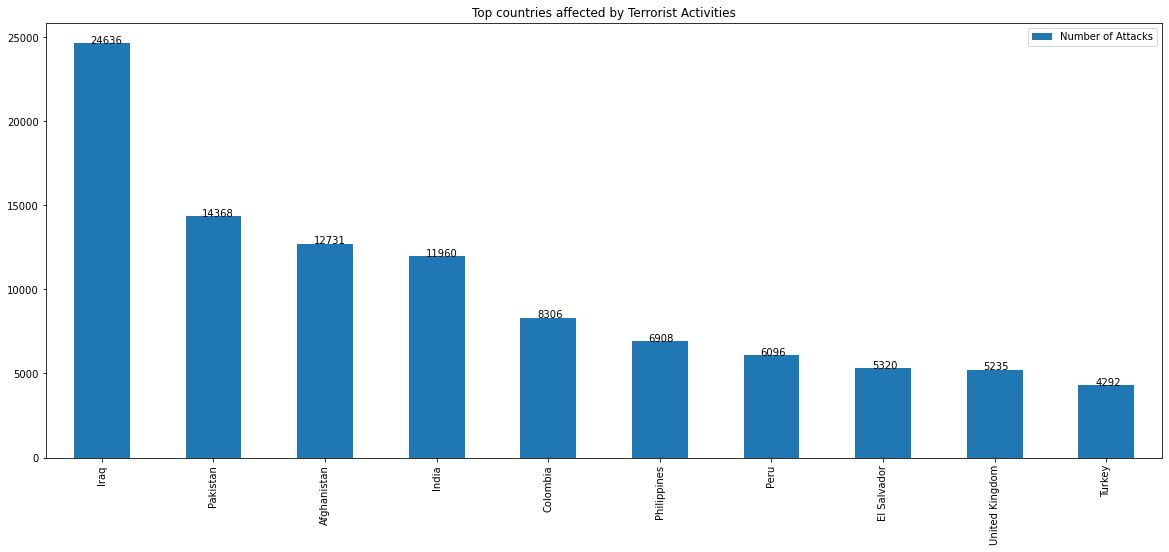

In [29]:
coun_terror=terror['Country'].value_counts()[:10].to_frame() 
coun_terror.columns=['Number of Attacks']
coun_terror
ax=coun_terror.plot.bar()
fig=plt.gcf()
plt.title('Top countries affected by Terrorist Activities')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

fig.set_size_inches(20,8)


We can see Iraq , Afaganistan and its neighbouring countries are constantly topping the chart

We are going to plot number of attacks and number of casualities in a bar chat for every significant country :



We are going to plot number of attacks and number of casualities in a bar chat for every significant country :



# We are going to plot number of attacks and number of casualities in a bar chat for every significant country :



### Number of attacks and deaths in the countries

In [30]:
# This will give the number of people killed in every country collectively
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame() 
# This will merge the coun_terror and coun_kill datasets 
# and give top 20 countries with no of attacks and no of people killed 
attack_kill = coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left')


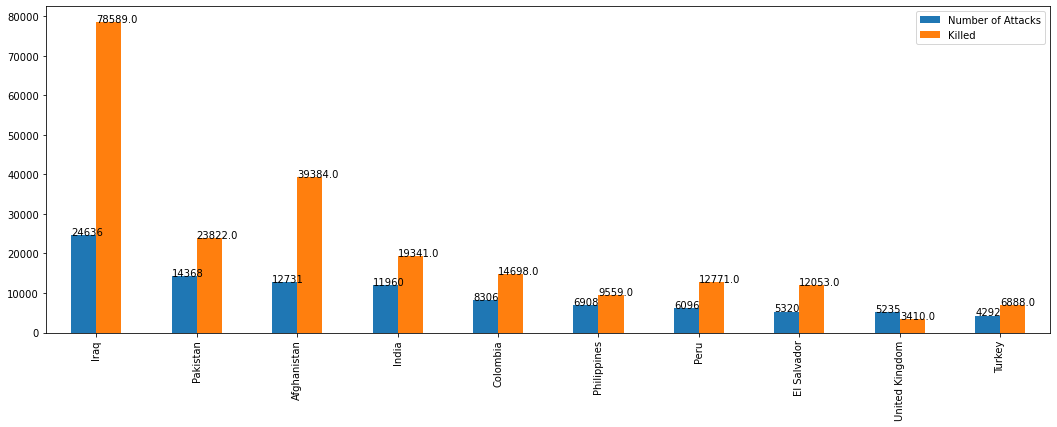

In [31]:
# Plotting the same on a bar chart
ax=attack_kill.plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+0.05))
fig=plt.gcf()
fig.set_size_inches(18,6)

###  1.Top 5 Indian Cities who has seen the terrorist acts the most


In [32]:
terror_filter = terror[terror['Target_type'] == "Private Citizens & Property"]
terror_filter = terror[terror['Country'] == "India"]
terror_filter = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter[terror_filter['city']!='Unknown' ]
data = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter.drop_duplicates(subset=None, keep='first', inplace=False)
data_city = pd.DataFrame({
    'city':data['city'].value_counts().index,
   'value':data['city'].value_counts().values
})
data = [
    {
        'x': data_city['city'][0:5].values,
        'y': data_city['value'][0:5].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
         #   'sizeref': 'sizeref',
            'size': data_city['value'][0:5]
              }
    }
]
iplot(data)


In [33]:
City_State = pd.merge(data_city, terror_filter, how='left', left_on='city', right_on='city')
City_State = City_State.drop_duplicates(subset='city', keep='first', inplace=False)
count = City_State['value'].values
m = folium.Map(location=[28,81], tiles="stamentoner", zoom_start=4)
for i in range(0,5):
   folium.Circle(
      location=[City_State.iloc[i]['latitude'], City_State.iloc[i]['longitude']],
      #location=[20, 81],
      popup=City_State.iloc[i]['city'],
      radius=int(count[i])*300,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

### 2. Top 5 Cities from Iraq who has seen the terrorist acts the most


In [34]:
terror_filter = terror[terror['Target_type'] == "Private Citizens & Property"]
terror_filter = terror[terror['Country'] == "Iraq"]
terror_filter = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter[terror_filter['city']!='Unknown' ]
data = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter.drop_duplicates(subset=None, keep='first', inplace=False)
data_city = pd.DataFrame({
    'city':data['city'].value_counts().index,
   'value':data['city'].value_counts().values
})
data = [
    {
        'x': data_city['city'][0:5].values,
        'y': data_city['value'][0:5].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
   #         'sizeref': 'sizeref',
            'size': data_city['value'][0:5]
              }
    }
]
iplot(data)



In [35]:
City_State = pd.merge(data_city, terror_filter, how='left', left_on='city', right_on='city')
City_State = City_State.drop_duplicates(subset='city', keep='first', inplace=False)
City_State = City_State.dropna()
count = City_State['value'].values
m = folium.Map(location=[33,44], tiles="stamentoner", zoom_start=6)
for i in range(0,5):
   folium.Circle(
      location=[City_State.iloc[i]['latitude'], City_State.iloc[i]['longitude']],
      #location=[20, 81],
      popup=City_State.iloc[i]['city'],
      radius=int(count[i])*20,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

### Total number of injuries in top 10 Cities


In [36]:
killed_terror = terror[['city','Wounded']]
terror_filter = terror[['city','latitude','longitude']]
terror_filter = terror_filter[terror_filter['city']!='Unknown' ]
data = terror_filter[['city','latitude','longitude']]
terror_filter = terror_filter.drop_duplicates(subset=None, keep='first', inplace=False)
data_city = pd.DataFrame({
    'city':killed_terror.dropna().groupby(['city'])['Wounded'].sum().index,
   'value':killed_terror.dropna().groupby(['city'])['Wounded'].sum().values
})

data_city = data_city.sort_values(['value'], ascending=False)

data = [
    {
        'x': data_city['city'][0:10].values,
        'y': data_city['value'][0:10].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
  #          'sizeref': 'sizeref',
            'size': data_city['value'][0:10]
              }
    }
]
iplot(data)

City_State = pd.merge(data_city, terror_filter, how='left', left_on='city', right_on='city')
City_State = City_State.drop_duplicates(subset='city', keep='first', inplace=False)
City_State = City_State.dropna()
count = City_State['value'].values
m = folium.Map(location=[28,2], tiles='stamentoner', zoom_start=2)
for i in range(0,50):
   folium.Circle(
      location=[City_State.iloc[i]['latitude'], City_State.iloc[i]['longitude']],
      #location=[20, 81],
      popup=City_State.iloc[i]['city'],
      radius=int(count[i])*20,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m


### Shifting interests of Terrorists thru Timeline of Wordclouds 


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\ROG-PC/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ROG-PC\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


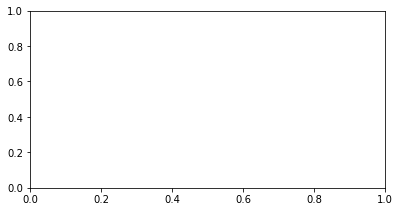

In [37]:
years = [2011,2012,2013,2014,2015,2016]
plt.figure(figsize=(14,15))
gs = gridspec.GridSpec(4, 2)
for i, cn in enumerate(years):
    ax = plt.subplot(gs[i])
    df_country = terror[terror['Year'] == cn]
    country_motive = df_country['Motive'].str.lower().str.cat(sep=' ')
    words=nltk.tokenize.word_tokenize(country_motive)
    word_dist = nltk.FreqDist(words)
    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(" ".join(words_except_stop_dist))
    ax.imshow(wordcloud)
    ax.set_title('Year ' + str(cn) + ' at a glance' )
    ax.axis('off')


### Motive behind attacks on Iraq over the years (1970 to 2016 aggregated)

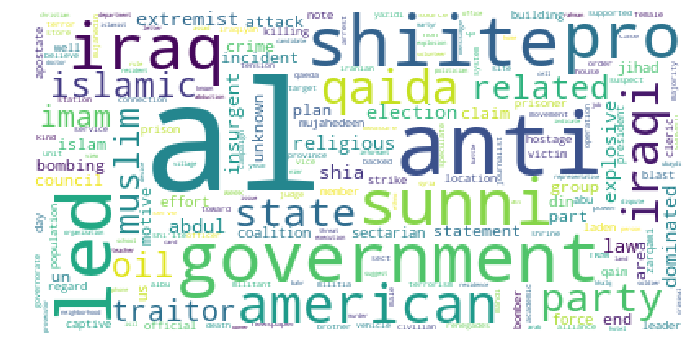

In [ ]:
df_country = terror[terror['Country'] == 'Iraq']
#df_country = df[df['iyear'] == 2014]
country_motive = df_country['Motive'].str.lower().str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(country_motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(14,6)
plt.axis('off')
plt.show()

### Motive behind attacks on USA over the years (1970 to 2016 aggregated)

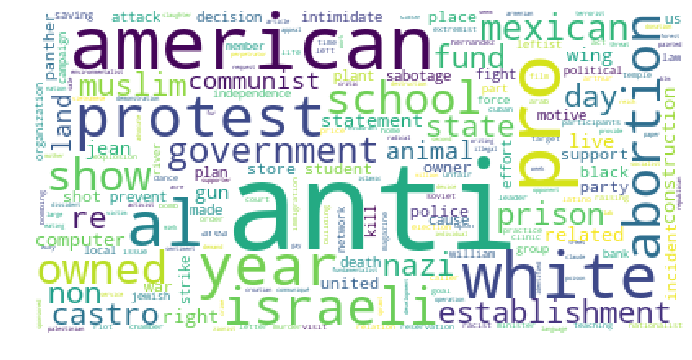

In [ ]:
df_country = terror[terror['Country'] == 'United States']
#df_country = df[df['iyear'] == 2014]
country_motive = df_country['Motive'].str.lower().str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(country_motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(14,6)
plt.axis('off')
plt.show()

### Motive behind attacks on India over the years (1970 to 2016 aggregated)

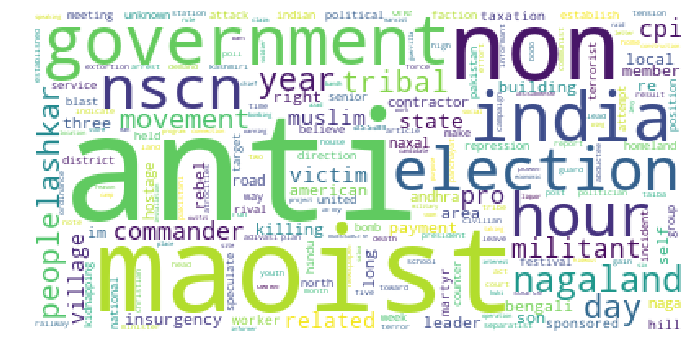

In [ ]:
df_country = terror[terror['Country'] == 'India']
#df_country = df[df['iyear'] == 2014]
country_motive = df_country['Motive'].str.lower().str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(country_motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(14,6)
plt.axis('off')
plt.show()

# Observathions

## 1)Hot zone of terrorism.

The Hot zones of Terrorism are in 
* Countries :Iraq, Afganisthan ,Paskistan,India, Colombia
* Cities : Bhagdad, New york , Kabul,Mosul,Karachi
* Regions : Middle east, North Africa, South Asia ,Sub-Saharan Africa

## 2) security issues and insights:

* Most of the targets are  innocent people and their property followed by Military and Police who are always in duty to protect the private citizens and their property
* The most active group is Taliban which is generally adopting Bombing/Explosion and Armed Assault because they are facilitated with Explosives and Firearms 
* the most claiming mode is personal announcement or through posting online
* Suicide attacks from year 2013 till 2016 which is a worrying factor and it is likely to increase further.
* We can see Iraq , Afaganistan and its neighbouring countries are constantly topping the chart
* By Word Cloud we can see Maosit ,Governemant, white, Protest are main resons for the attacks
* From sentimental analysis, the most frequent word observed are " muslims","islamic". It is common belief that terrorists are muslims but infact the most targetted and suffured by terrorism are muslims.Iran,Paskistan,Afganisthan are muslim dominat nations.